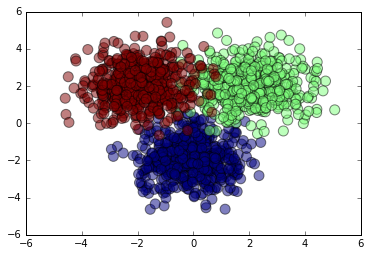

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create random training data again
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

# 0, -2
# 2, 2
# -2, 2

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2,2])
X3 = np.random.randn(Nclass, D) + np.array([-2,2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)

In [3]:
N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1
    
# Now some new parts
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

tfX = tf.placeholder(tf.float32, [None, D]) # can pass in any size N
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M])
b1 = init_weights([M, 1])
W2 = init_weights([M, K])
b2 = init_weights([K])

py_x = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, T))
# Tensorflow calculatest the derivatives and graients automatically!

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)
predict_op = tf.argmax(py_x, 1)

sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 10 == 0:
        print(np.mean(Y == pred))


ValueError: Dimension 0 in both shapes must be equal, but are 1500 and 3 for 'SoftmaxCrossEntropyWithLogits_1' (op: 'SoftmaxCrossEntropyWithLogits') with input shapes: [1500,3], [3,3].

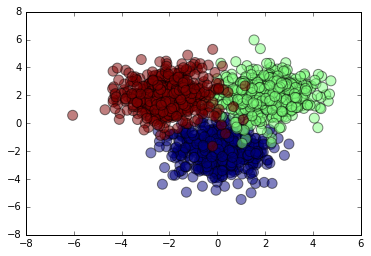

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.333333333333
0.338
0.631333333333
0.631333333333
0.561333333333
0.534
0.533333333333
0.546
0.560666666667
0.584
0.600666666667
0.62
0.628666666667
0.634666666667
0.641333333333
0.644666666667
0.653333333333
0.662
0.679333333333
0.702
0.717333333333
0.738
0.756
0.767333333333
0.778
0.786666666667
0.801333333333
0.812666666667
0.822
0.830666666667
0.846
0.857333333333
0.869333333333
0.880666666667
0.888
0.900666666667
0.910666666667
0.92
0.926666666667
0.934666666667
0.941333333333
0.944
0.944666666667
0.948666666667
0.951333333333
0.952666666667
0.953333333333
0.954666666667
0.957333333333
0.956666666667
0.959333333333
0.96
0.961333333333
0.961333333333
0.961333333333
0.963333333333
0.964
0.964666666667
0.964666666667
0.964
0.963333333333
0.962666666667
0.963333333333
0.963333333333
0.963333333333
0.964
0.964
0.964
0.964
0.

In [7]:
# neural network in TensorFlow very simple example.
#
# the notes for this class can be found at: 
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# create random training data again
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

# let's see what it looks like
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

N = len(Y)
# turn Y into an indicator matrix for training
T = np.zeros((N, K))
for i in range(N):
    T[i, Y[i]] = 1


# tensor flow variables are not the same as regular Python variables
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2


tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M]) # create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

py_x = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, tfY)) # compute costs
# WARNING: This op expects unscaled logits,
# since it performs a softmax on logits
# internally for efficiency.
# Do not call this op with the output of softmax,
# as it will produce incorrect results.

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
# input parameter is the learning rate

predict_op = tf.argmax(py_x, 1)
# input parameter is the axis on which to choose the max

# just stuff that has to be done
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 10 == 0:
        print(np.mean(Y == pred))

